## Task : End-to-End ML Pipeline with Scikit-learn Pipeline API

###*** Objective:*** Build a reusable and production-ready machine learning pipeline for predicting customer churn.

### Dataset: Telco Churn Dataset

### Instructions:
    ● Implement data preprocessing steps (e.g., scaling, encoding) using Pipeline
    ● Train models like Logistic Regression and Random Forest
    ● Use GridSearchCV for hyperparameter tuning
    ● Export the complete pipeline using joblib

In [1]:
!nvidia-smi

Mon Jul 21 10:55:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV ,StratifiedKFold

In [3]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [8]:
df[pd.to_numeric(df["TotalCharges"], errors="coerce").isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df = df.dropna(subset=["TotalCharges"])

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Data Visualization

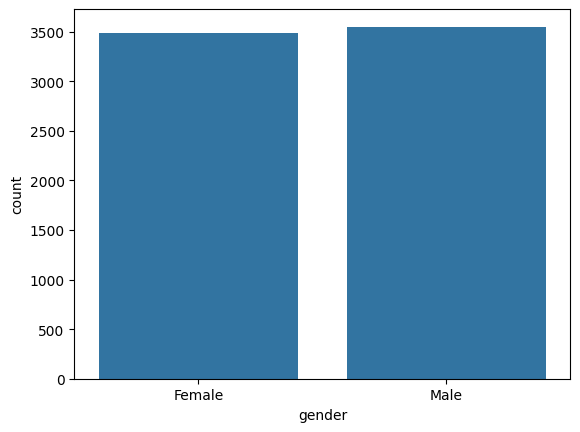

In [13]:
import seaborn as sns
sns.countplot(x='gender', data=df)
plt.show()

<Axes: xlabel='count', ylabel='Partner'>

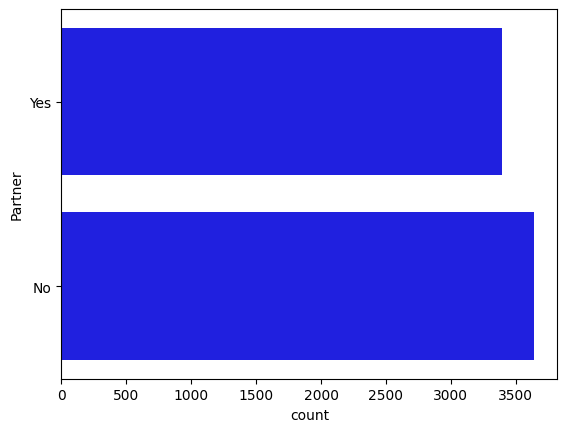

In [14]:
sns.countplot(df['Partner'], color='blue')

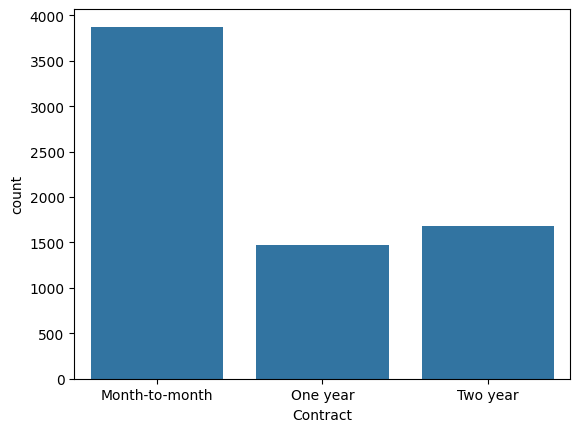

In [15]:
sns.countplot(x='Contract', data=df)
plt.show()

<Axes: xlabel='Dependents', ylabel='count'>

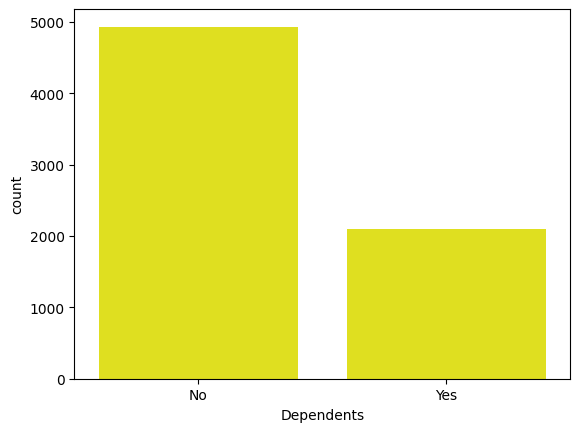

In [16]:
sns.countplot(x=df['Dependents'] , color='yellow')

## data Cleaning

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
lb=LabelEncoder()

In [20]:
y=lb.fit_transform(df['Churn'])

In [21]:
y.shape

(7032,)

In [22]:
X=df.drop(['Churn','customerID'] , axis=1)

In [23]:
X.shape

(7032, 19)

In [24]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, stratify=y, random_state=42, shuffle=True)
# Stratified CV splitter for class‑imbalance safety
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Preprocessing and Pipelining

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier

In [26]:
# Extracting column names without data
Numeric_columns= ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_columns=[c for c in X.columns if c not in Numeric_columns]

In [27]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [28]:
preprocessor=ColumnTransformer(transformers=[
    ("Scaler ", StandardScaler(),Numeric_columns),
    ("OHE ",OneHotEncoder(handle_unknown='ignore') , categorical_columns )
 ])

In [29]:
pipe= Pipeline(steps=[
    ('Prep', preprocessor),
    ('model', LogisticRegression(max_iter=100, class_weight='balanced'))
])

## Grid search with cross‑validation

In [30]:
param_grid = [

    {   # Logistic Regression branch
        "model": [LogisticRegression(max_iter=1000, class_weight="balanced")],
        "model__C": [0.01, 0.1, 1, 10],  # value to control the regularization
        "model__penalty": ["l2", "l1"],  # regularization
        "model__solver": ["liblinear"], #optimizer
    },
     {   # Random Forest branch
        "model": [RandomForestClassifier(class_weight="balanced")],
        "model__n_estimators": [200, 500],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
        "model__min_samples_leaf": [1, 3],
    },
     ]

In [31]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",      # better than accuracy for churn
    n_jobs=-1,
    verbose=2,
    refit=True,             # best model re‑trained on full training set
    return_train_score=False,
)


In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Prep',
                                        ColumnTransformer(transformers=[('Scaler ',
                                                                         StandardScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('OHE ',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetServi...
             param_grid=[{'model': [LogisticRegression(class_weight='balanced',
                                                       max_iter=1000)],
                          'model__C': [0.01, 0.1, 1, 10],
                          'model__penalty': ['l2', 'l1'],
                          'model__solver': ['liblinear']},
                         {'model': [RandomForestClassifier(class_weight='balanced')],
                          'model__max_depth': [None, 10, 20],
                          'model__min_samples_leaf': [1, 3],
                          'model__min_samples_split': [2, 5],
                          'model__n_estimators': [200, 500]}],
             scoring='roc_auc', verbose=2)

In [33]:
print("Best model type :", type(grid.best_estimator_.named_steps["model"]).__name__)
print("Best params     :", grid.best_params_)
print("CV ROC‑AUC      :", grid.best_score_)


Best model type : RandomForestClassifier
Best params     : {'model': RandomForestClassifier(class_weight='balanced'), 'model__max_depth': 10, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 500}
CV ROC‑AUC      : 0.8473887939621175


## Model Evaluation

In [38]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



In [39]:
print(accuracy_score(y_test, y_pred))

0.7583511016346838


## Extracting using Joblib

In [40]:
import joblib
joblib.dump(grid.best_estimator_, "telco_churn_pipeline.joblib")


['telco_churn_pipeline.joblib']

In [43]:
proba = grid.predict_proba(X_test)[:, 1]
print("Test ROC‑AUC :", roc_auc_score(y_test, proba))

Test ROC‑AUC : 0.8322380170936632


### End of the Task With best model RandomForestClassifier with CV ROC‑AUC      : 84% and accuracy_score is 75